Machine Learning and Intellectual Analysis of Data (Learning course) \
Bohdan Pavlyshenko (https://www.linkedin.com/in/bpavlyshenko/) \
Youtube video: https://www.youtube.com/watch?v=Ypc-utTTsAo&list=PLMQt7tnruMvF1jetHNUKjMtHKSp78H2bb&index=17

# Image Classification (Pytorch, FashionMNIST)

Used resource:\
https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:01<00:00, 19335907.87it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 337222.03it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6042141.43it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 2108209.04it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
print(training_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [4]:
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)


In [5]:
a=next(iter(train_dataloader))

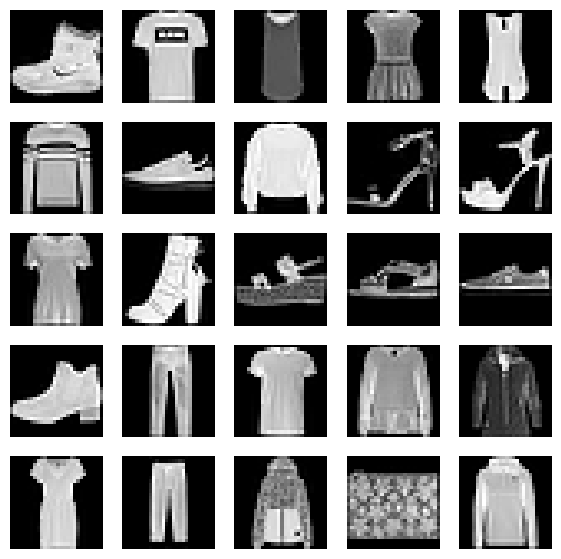

In [6]:
plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    img=a[0][i][0].cpu().detach().numpy()
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.axis('off')
plt.show()

In [7]:
next(iter(train_dataloader))

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [9]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [11]:
train_size = len(train_dataloader.dataset)
test_size = len(test_dataloader.dataset)
train_size, test_size

(60000, 10000)

In [12]:
epochs = 15

train_loss=0.0
test_loss=0.0
train_acc=0.0
test_acc=0.0

for epoch in range(epochs):

    model.train()
    for X, y in train_dataloader:
        X, y = X.to(device), y.to(device)
        pred = model(X).to(device)
        loss = loss_fn(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss+=loss.item()
        train_acc += (pred.argmax(1) == y).type(torch.float).sum().item()
    with torch.no_grad():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X).to(device)
            loss=loss_fn(pred, y).item()
            test_loss += loss
            test_acc += (pred.argmax(1) == y).type(torch.float).sum().item()
    train_loss /= len(train_dataloader)
    test_loss /= len(test_dataloader)
    train_acc /= train_size
    test_acc /= test_size
    print(f'epoch: {epoch+1}, train_loss: {np.round(train_loss,5)}, \
test_acc: {np.round(train_acc,5)}, test_loss: {np.round(test_loss,5)}, \
test_acc: {np.round(test_acc,5)}')

epoch: 1, train_loss: 2.22219, test_acc: 0.33382, test_loss: 2.13332, test_acc: 0.4466
epoch: 2, train_loss: 1.99948, test_acc: 0.54307, test_loss: 1.84873, test_acc: 0.57614
epoch: 3, train_loss: 1.64521, test_acc: 0.60849, test_loss: 1.48164, test_acc: 0.61546
epoch: 4, train_loss: 1.33291, test_acc: 0.63496, test_loss: 1.2335, test_acc: 0.63286
epoch: 5, train_loss: 1.13649, test_acc: 0.64878, test_loss: 1.08094, test_acc: 0.64476
epoch: 6, train_loss: 1.01232, test_acc: 0.66133, test_loss: 0.98177, test_acc: 0.65676
epoch: 7, train_loss: 0.92878, test_acc: 0.67416, test_loss: 0.91316, test_acc: 0.66847
epoch: 8, train_loss: 0.86916, test_acc: 0.68671, test_loss: 0.86303, test_acc: 0.68097
epoch: 9, train_loss: 0.82451, test_acc: 0.69864, test_loss: 0.82467, test_acc: 0.69347
epoch: 10, train_loss: 0.78959, test_acc: 0.71133, test_loss: 0.79398, test_acc: 0.70547
epoch: 11, train_loss: 0.76108, test_acc: 0.72468, test_loss: 0.76835, test_acc: 0.71877
epoch: 12, train_loss: 0.73686, 

In [13]:
torch.save(model.state_dict(), "model.pth")

In [14]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [15]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
id=35
x, y = test_data[id][0], test_data[id][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "T-shirt/top", Actual: "T-shirt/top"


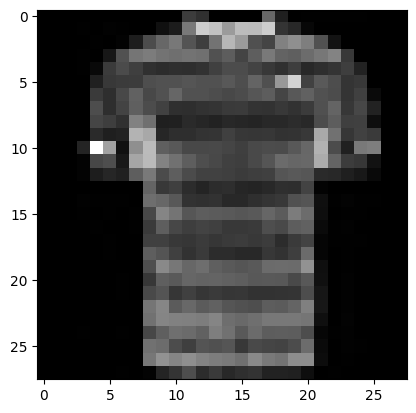

In [16]:
pred_img=test_data[id][0][0].cpu().detach().numpy()
_=plt.imshow(pred_img,cmap=plt.get_cmap('gray'))